
# Project: Investigate a Dataset - [Patients appointments showup]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question
of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.‘ScheduledDay’ tells us on what day the patient set up their appointment.‘Neighborhood’ indicates thelocation of the hospital.‘Scholarship’ indicates whether or not the patient isenrolled in Brasilian welfareprogram Bolsa Família.
'No show'column indicates that the patient showed up to their appointment and 'yes' if theyy did not show up.


### Question(s) for Analysis
what factors affect patients showing up to their appointment?
does recieving a text for the appointment has a major effect on the showing up of patients?


In [58]:
#importing the statements for all the packages that will be used in the analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns 


In [59]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

in this section of the report, loading the data, checking for cleanliness then trim and clean the dataset for analysis will be preformed.


### General Properties
exploaring the dataset from different aspects and understanding the data


In [60]:
# Loading the data and Performing operations to inspect data.
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [61]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [62]:
x= df.iloc[10:15,:15]
print(x)

       PatientId  AppointmentID Gender          ScheduledDay  \
10  7.345362e+14        5630213      F  2016-04-27T14:58:11Z   
11  7.542951e+12        5620163      M  2016-04-26T08:44:12Z   
12  5.666548e+14        5634718      F  2016-04-28T11:33:51Z   
13  9.113946e+14        5636249      M  2016-04-28T14:52:07Z   
14  9.988472e+13        5633951      F  2016-04-28T10:06:24Z   

          AppointmentDay  Age   Neighbourhood  Scholarship  Hipertension  \
10  2016-04-29T00:00:00Z   30  NOVA PALESTINA            0             0   
11  2016-04-29T00:00:00Z   29  NOVA PALESTINA            0             0   
12  2016-04-29T00:00:00Z   22  NOVA PALESTINA            1             0   
13  2016-04-29T00:00:00Z   28  NOVA PALESTINA            0             0   
14  2016-04-29T00:00:00Z   54  NOVA PALESTINA            0             0   

    Diabetes  Alcoholism  Handcap  SMS_received No-show  
10         0           0        0             0      No  
11         0           0        0         

In [63]:
df.shape

(110527, 14)

In [64]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


the average age for the patients is 37 years

the maximum age for the patients is 115 years

the minumum age is -1 years which is illogical.

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


comparing the data shape with the data info it is found that no null elements exist; no missing data.


### Data Cleaning
in this section of the report, data found to be not neccessary for the analysis will be removed and mistakes inside the data will be corrected if possible. 
 

In [66]:
# droping of patientId and AppointmentID were they will be irelvant to the analysis.
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace= True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [67]:
#Hipertension is grammatically incorrect and will be adjusted
df.rename(columns={'Hipertension':'Hypertension'}, inplace=True)
df.head()                

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [68]:
# changing dash to underscore to unify the data presentation.
df.rename(columns={'No-show':'No_show'}, inplace= True)
df.head()  


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

in this section of the report, exploring the data through statistics and visualizations and comparing the visualizations to get an insight about the data.


### Research Question 1 (does the patient health, age and location has a major effect on their showing up to their appointment?)

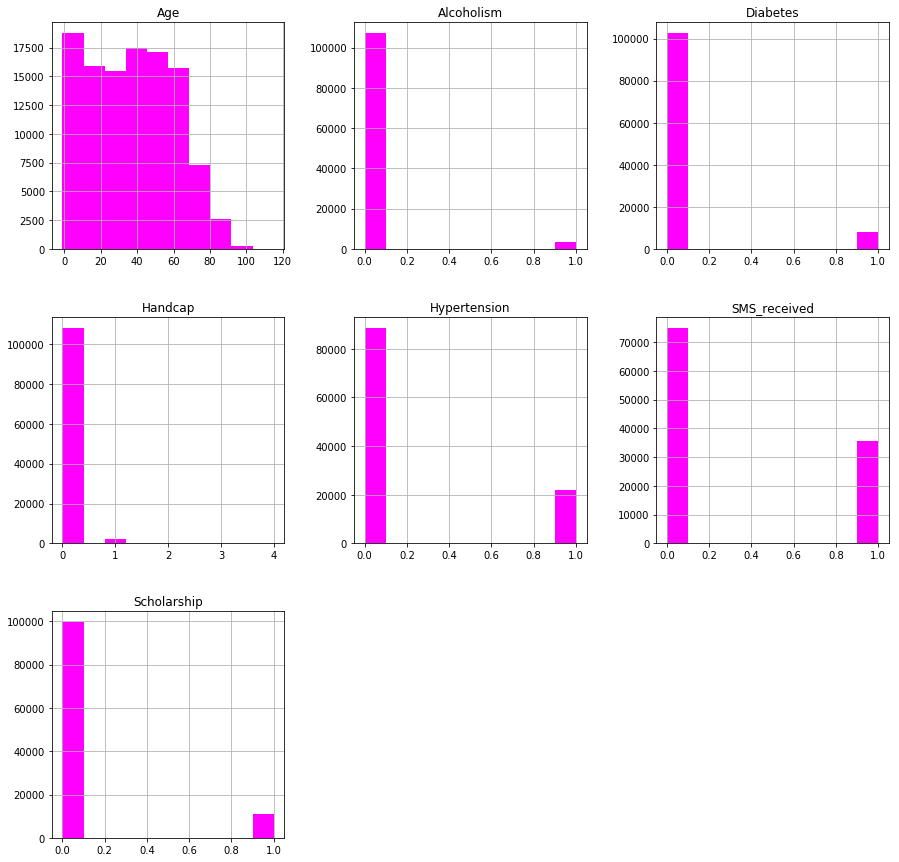

In [69]:
#using visualizations as histogram to explore the dataset.
df.hist(figsize=(15,15), color='magenta');


the age distribution seems normal.

less than half the patients numbers recieved a SMS message.

most patients didnot suffer from alcoholsim, diabetes nor are handcap.

less than 19% of patients suffers from hypertension.

most patients arenot subscriped to the wellfare program; only about 15000 are.

In [70]:
#lets see the relation between the age of the patients and their showing up to the appointment.
df[df.No_show=='No'].count()

Gender            88208
ScheduledDay      88208
AppointmentDay    88208
Age               88208
Neighbourhood     88208
Scholarship       88208
Hypertension      88208
Diabetes          88208
Alcoholism        88208
Handcap           88208
SMS_received      88208
No_show           88208
dtype: int64

In [71]:
df[df.No_show=='Yes'].count()

Gender            22319
ScheduledDay      22319
AppointmentDay    22319
Age               22319
Neighbourhood     22319
Scholarship       22319
Hypertension      22319
Diabetes          22319
Alcoholism        22319
Handcap           22319
SMS_received      22319
No_show           22319
dtype: int64

less than 20% of patients didnot show up for their appointment.

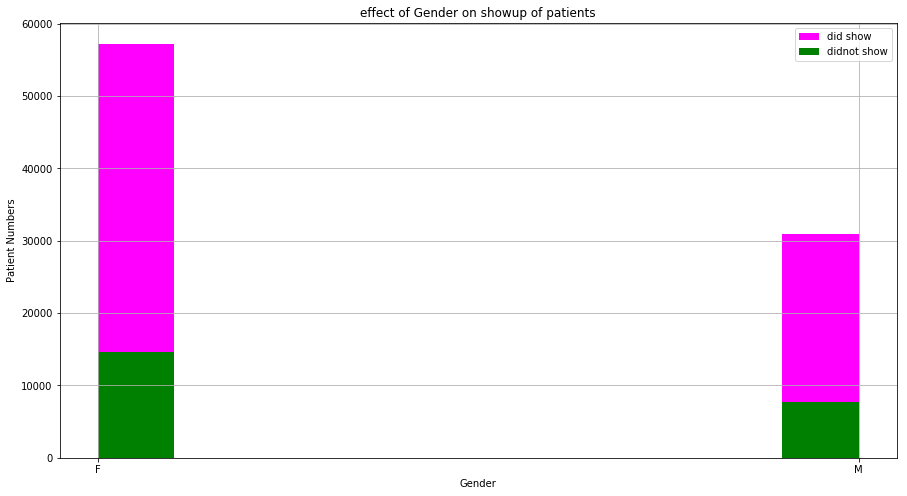

In [72]:
#comparing Gender effect on showup of patients.
didnot_show= df.No_show=='Yes'
did_show= df.No_show=='No'
plt.figure(figsize=[15,8])
df.Gender[did_show].hist(color='magenta', label='did show')
df.Gender[didnot_show].hist(color='green', label='didnot show')
plt.legend()
plt.title('effect of Gender on showup of patients')
plt.xlabel('Gender')
plt.ylabel('Patient Numbers');

In [73]:
df.groupby('Gender').No_show.value_counts()

Gender  No_show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: No_show, dtype: int64

Gender is not effective in regards to the showups of patients.

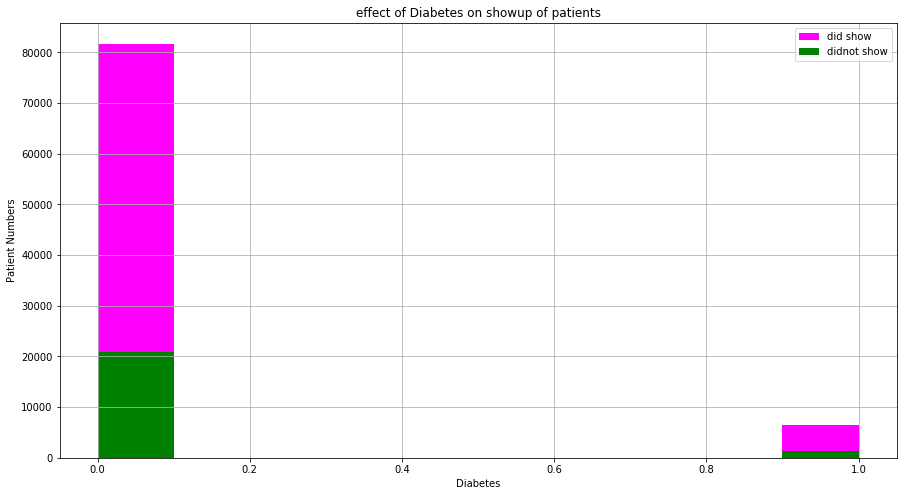

In [74]:
#comparing the effects of chronical dieases on the showup of patients.
#comparing Diabetes effect on showup of patients.
plt.figure(figsize=[15,8])
df.Diabetes[did_show].hist(color='magenta', label='did show')
df.Diabetes[didnot_show].hist(color='green', label='didnot show')
plt.legend()
plt.title('effect of Diabetes on showup of patients')
plt.xlabel('Diabetes')
plt.ylabel('Patient Numbers');

Diabetes is not effective in regards to the showups of patients.

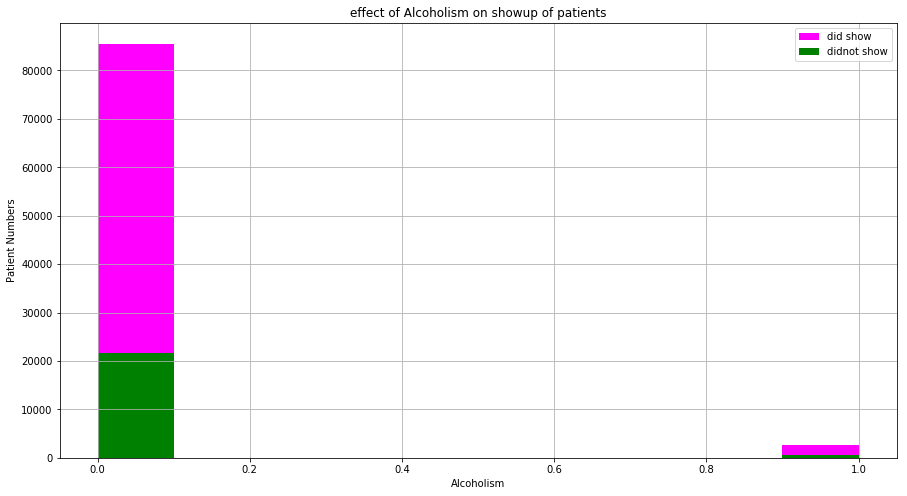

In [75]:
#comparing Alcoholism effect on showup of patients.
plt.figure(figsize=[15,8])
df.Alcoholism[did_show].hist(color='magenta', label='did show')
df.Alcoholism[didnot_show].hist(color='green', label='didnot show')
plt.legend()
plt.title('effect of Alcoholism on showup of patients')
plt.xlabel('Alcoholism')
plt.ylabel('Patient Numbers');

Alcoholism is not effective in regards to the showups of patients.

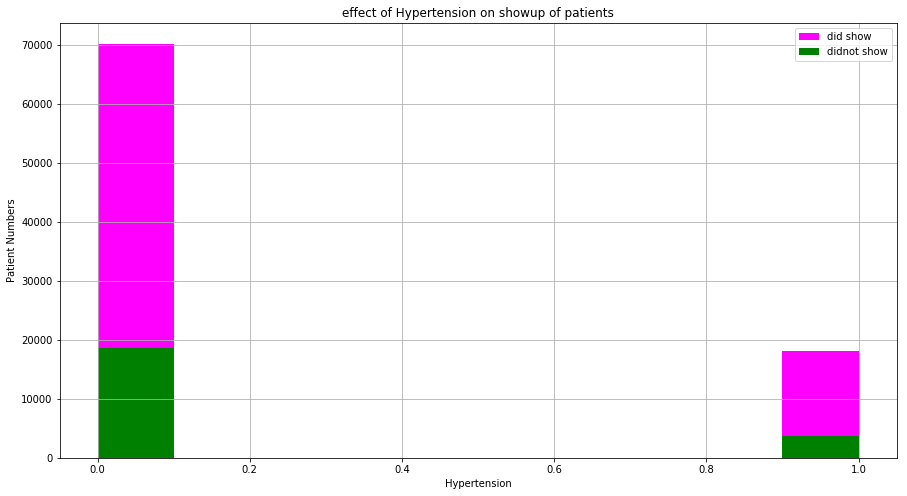

In [76]:
#comparing Hypertension effect on showup of patients.
plt.figure(figsize=[15,8])
df.Hypertension[did_show].hist(color='magenta', label='did show')
df.Hypertension[didnot_show].hist(color='green', label='didnot show')
plt.legend()
plt.title('effect of Hypertension on showup of patients')
plt.xlabel('Hypertension')
plt.ylabel('Patient Numbers');

hypertension is not effective in regards to the showups.

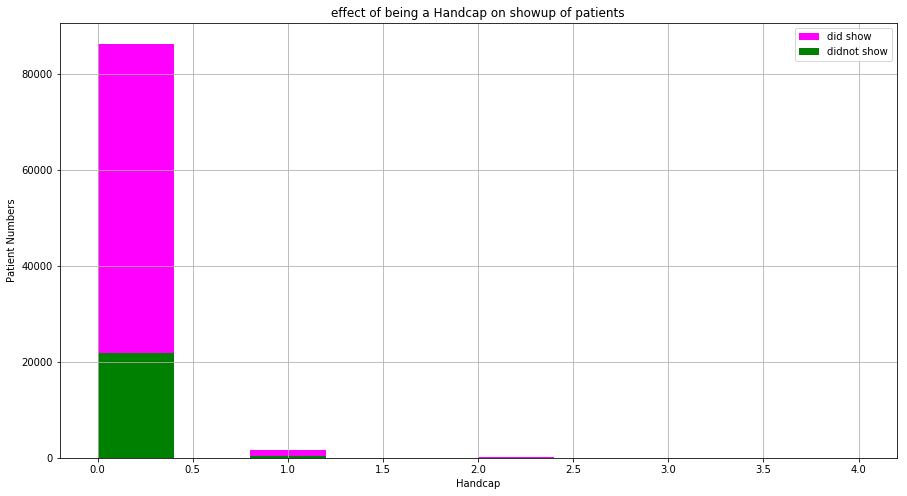

In [77]:
#compare between patients who showed up and how didn't in regards to being a Handcap.
plt.figure(figsize=[15,8])
df.Handcap[did_show].hist(color='magenta', label='did show')
df.Handcap[didnot_show].hist(color='green', label='didnot show')
plt.legend()
plt.title('effect of being a Handcap on showup of patients')
plt.xlabel('Handcap')
plt.ylabel('Patient Numbers');

being a Handcap is not effective in regards to the showups.

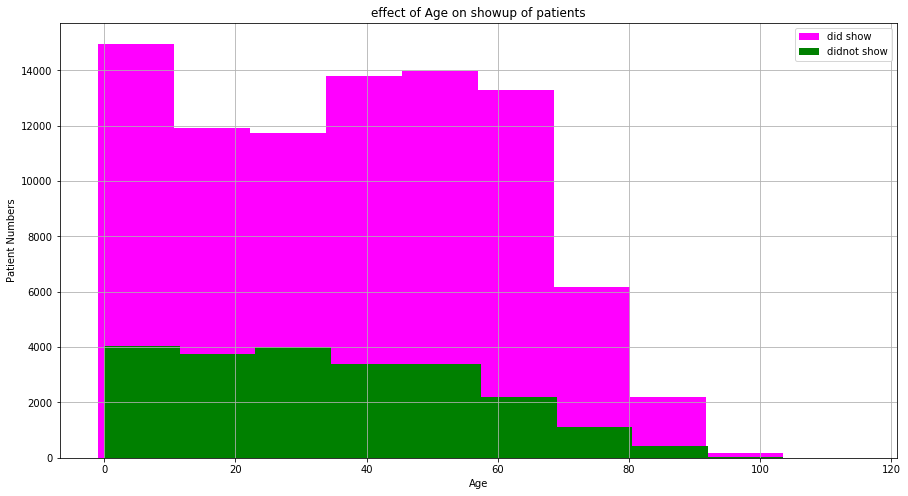

In [78]:
#compare between patients who showed up and how didn't in regards to their age.
plt.figure(figsize=[15,8])
df.Age[did_show].hist(color='magenta', label='did show')
df.Age[didnot_show].hist(color='green', label='didnot show')
plt.legend()
plt.title('effect of Age on showup of patients')
plt.xlabel('Age')
plt.ylabel('Patient Numbers');

patients age (0-10) had a high showup rate then patients age(40-60), therefore age is significant to showup of patients.

/opt/conda/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


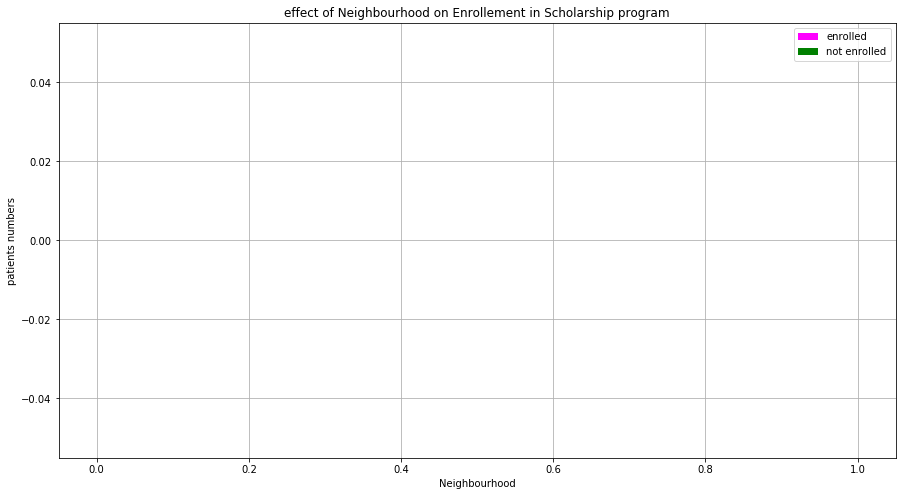

In [79]:
#compare between the Neighbourhood and the Scholarship program.
not_enrolled= df.Scholarship=='0'
enrolled= df.Scholarship=='1'
plt.figure(figsize=[15,8])
df.Neighbourhood[enrolled].hist(color='magenta', label='enrolled')
df.Neighbourhood[not_enrolled].hist(color='green', label='not enrolled')
plt.legend()
plt.title('effect of Neighbourhood on Enrollement in Scholarship program')
plt.xlabel('Neighbourhood')
plt.ylabel('patients numbers');


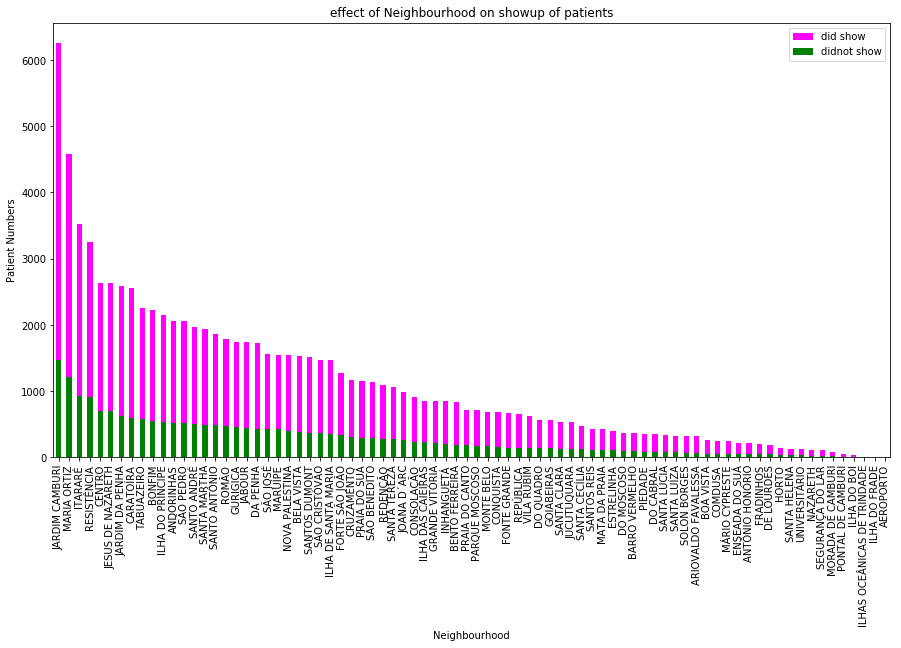

In [80]:
#compare between patients who showed up and how didn't in regards to Neighbourhood.
plt.figure(figsize=[15,8])
df.Neighbourhood[did_show].value_counts().plot(kind='bar', color='magenta', label='did show')
df.Neighbourhood[didnot_show].value_counts().plot(kind='bar', color='green', label='didnot show')
plt.legend()
plt.title('effect of Neighbourhood on showup of patients')
plt.xlabel('Neighbourhood')
plt.ylabel('Patient Numbers');


the number of patients who showed up in JARDIM CAMBURI is significantly higher than other Neighbourhood; that shows that the neighbourhood is significant to the showup of patients.

### Research Question 2  (does recieving a text for the appointment has a major effect on the showing up of patients?)

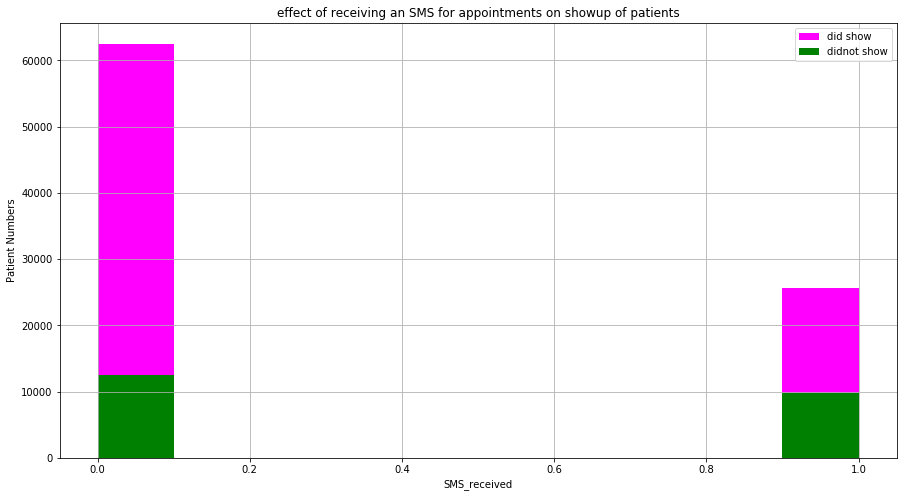

In [55]:
#comparing between the showuping of patients who received a SMS and who didn't.
plt.figure(figsize=[15,8])
df.SMS_received[did_show].hist(color='magenta', label='did show')
df.SMS_received[didnot_show].hist(color='green', label='didnot show')
plt.legend()
plt.title('effect of receiving an SMS for appointments on showup of patients')
plt.xlabel('SMS_received')
plt.ylabel('Patient Numbers');


the patients who didn't recieve a SMS showedup more than who did.

<a id='conclusions'></a>
## Conclusions

The Neighbourhood was strongly related to the showup of patients.
Age was also effective to the showups of patients were 0-10 age group recieved the highest showups then the age group of 35-70 years.
patients who didn't recieve an SMS showed up more than patients who did; which is very strange showing that SMS was not an effective tool for patients to showup.


### Limitations
could'nt find an appropriate relation between Gender, Diabetes, Handcap and Alchoholism with the showing up of patients to their appointments through the dataset that shows a correlation between them.


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])